# Corona Virus Pandemic - In India
## An Exploratory Data Visualization and Analysis 


Coronavirus disease (COVID-19) is an infectious disease caused by the SARS-CoV-2 virus.

Most people infected with the virus will experience mild to moderate respiratory illness and recover without requiring special treatment. However, some will become seriously ill and require medical attention. Older people and those with underlying medical conditions like cardiovascular disease, diabetes, chronic respiratory disease, or cancer are more likely to develop serious illness. Anyone can get sick with COVID-19 and become seriously ill or die at any age. 


In this notebook, We will take a look at the current situation in India. 
We will take a look at the regions which are most hampered by the outbreak and how numbers have steadily climbed in the country. 


## PROGRAMMING LANGUAGE AND MODULES INCLUDED IN THIS PROJECT :


In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
%matplotlib notebook

## Data Sets Included in this Project :

In [39]:
covid19_df = pd.read_csv(r"C:\Users\HARSHIT\Downloads\COVID19-EDA-INDIA-master\COVID19-EDA-INDIA-master\covid_19_india.csv")
individuals_df = pd.read_csv(r"C:\Users\HARSHIT\Downloads\COVID19-EDA-INDIA-master\COVID19-EDA-INDIA-master\IndividualDetails.csv")
excel_file = pd.ExcelFile(r"C:\Users\HARSHIT\Downloads\COVID19-EDA-INDIA-master\COVID19-EDA-INDIA-master\ISPA.xlsx")
covid_df = pd.ExcelFile(r"C:\Users\HARSHIT\Downloads\COVID19-EDA-INDIA-master\COVID19-EDA-INDIA-master\Covid cases in India.xlsx")
dbd_India=pd.read_excel(r"C:\Users\HARSHIT\Downloads\COVID19-EDA-INDIA-master\COVID19-EDA-INDIA-master\per_day_cases.xlsx",parse_dates=True,sheet_name="India")
vaccine_df= pd.read_csv(r"C:\Users\HARSHIT\Downloads\COVID19-EDA-INDIA-master\COVID19-EDA-INDIA-master\covid_vaccine_statewise.csv")
indian_states_df = excel_file.parse('Sheet1')

In [7]:
covid19_df.head()

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
0,1,30/01/20,6:00 PM,Kerala,1,0,0,0,1
1,2,31/01/20,6:00 PM,Kerala,1,0,0,0,1
2,3,01/02/20,6:00 PM,Kerala,2,0,0,0,2
3,4,02/02/20,6:00 PM,Kerala,3,0,0,0,3
4,5,03/02/20,6:00 PM,Kerala,3,0,0,0,3


In [8]:
covid19_df.tail()

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
3634,3635,01/07/20,8:00 AM,Tripura,-,-,1086,1,1388
3635,3636,01/07/20,8:00 AM,Uttarakhand,-,-,2231,41,2881
3636,3637,01/07/20,8:00 AM,Uttar Pradesh,-,-,16084,697,23492
3637,3638,01/07/20,8:00 AM,West Bengal,-,-,12130,668,18559
3638,3639,01/07/20,8:00 AM,Cases being reassigned to states,-,-,0,0,6915


In [9]:
covid19_df.shape

(3639, 9)

In [10]:
covid19_df.isna().sum()

Sno                         0
Date                        0
Time                        0
State/UnionTerritory        0
ConfirmedIndianNational     0
ConfirmedForeignNational    0
Cured                       0
Deaths                      0
Confirmed                   0
dtype: int64

Here, we see that there are no missing values in this dataset which makes my job more easier. Let us now have a look at the most recent records for each state to gain an idea about where we stand currently.

In [11]:
covid19_df_latest = covid19_df[covid19_df['Date']=="01/07/20"]
covid19_df_latest.head()

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
3603,3604,01/07/20,8:00 AM,Andaman and Nicobar Islands,-,-,50,0,97
3604,3605,01/07/20,8:00 AM,Andhra Pradesh,-,-,6511,187,14595
3605,3606,01/07/20,8:00 AM,Arunachal Pradesh,-,-,62,1,191
3606,3607,01/07/20,8:00 AM,Assam,-,-,5647,12,8227
3607,3608,01/07/20,8:00 AM,Bihar,-,-,7687,67,10043


In [12]:
covid19_df_latest['Confirmed'].sum()

585493

## STATEWISE FIGURES

<IPython.core.display.Javascript object>


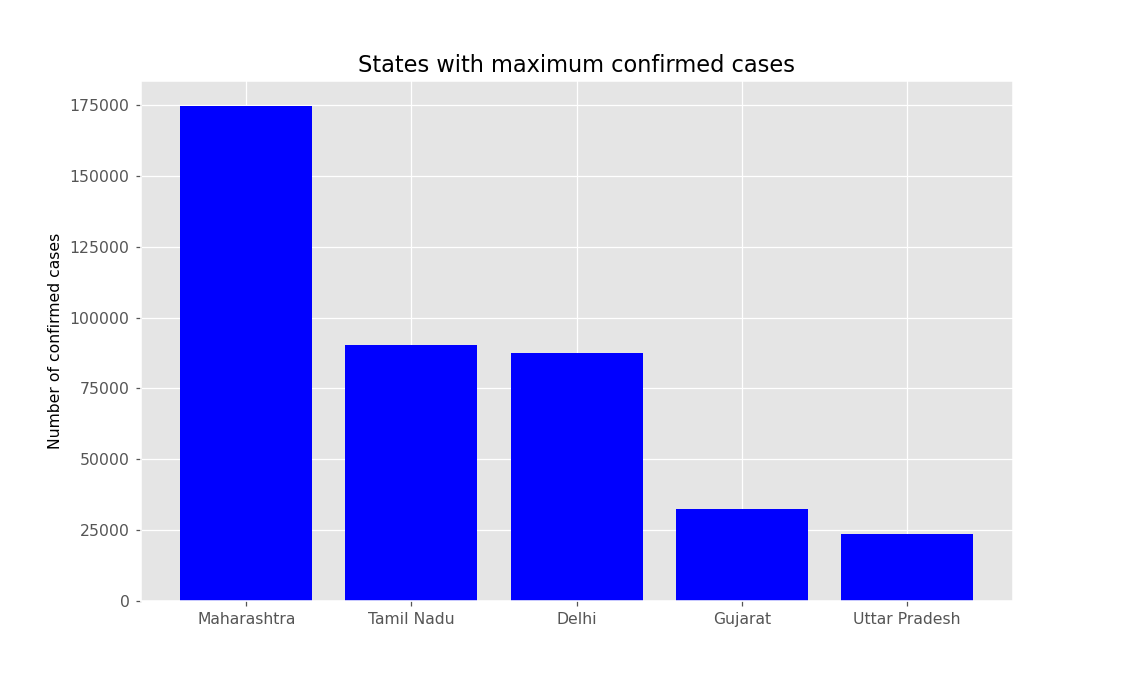

In [21]:
covid19_df_latest = covid19_df_latest.sort_values(by=['Confirmed'],ascending = False)
plt.figure(figsize=(10,6),dpi = 90)
plt.bar(covid19_df_latest['State/UnionTerritory'][:5],covid19_df_latest['Confirmed'][:5],align='center',color='blue')
plt.ylabel('Number of confirmed cases')
plt.title('States with maximum confirmed cases')
plt.show()

On inspecting the above visualization, we see that Maharashtra has the most number of inspected cases as of now.
The situation in Maharashtra is so grave that no other state in India has crossed even half that mark as per the data we have. 
Tamil Nadu and Delhi are about to touch the 100000 mark whereas Gujarat has around 32000 cases and Uttar Pradesh over 22000+ cases.

In [22]:
covid19_df_latest['Deaths'].sum()

17400

As per the data in the dataset, India has had 17400 deaths across all states. We will now see which states have the most deaths.

<IPython.core.display.Javascript object>


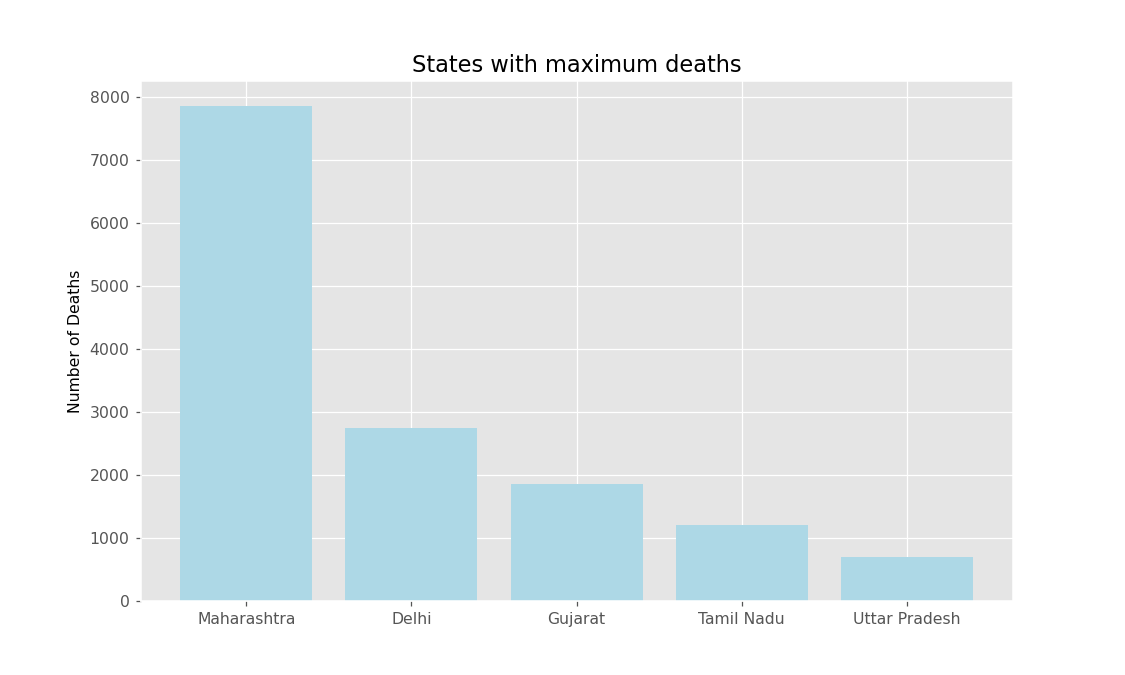

In [23]:
covid19_df_latest = covid19_df_latest.sort_values(by=['Deaths'],ascending = False)
plt.figure(figsize=(10,6), dpi=90)
plt.bar(covid19_df_latest['State/UnionTerritory'][:5], covid19_df_latest['Deaths'][:5], align='center',color='lightblue')
plt.ylabel('Number of Deaths')
plt.title('States with maximum deaths')
plt.show()

Next up, I wanted to look at the number of deaths per confirmed cases in different Indian states to gain a better idea about the healthcare facilities available.

In [24]:
covid19_df_latest['Deaths/Confirmed Cases'] = (covid19_df_latest['Confirmed']/covid19_df_latest['Deaths']).round(2)
covid19_df_latest['Deaths/Confirmed Cases'] = [np.nan if x==float("inf") else x for x in covid19_df_latest['Deaths/Confirmed Cases']]
covid19_df_latest = covid19_df_latest.sort_values(by=['Deaths/Confirmed Cases'], ascending=True,na_position='last')
covid19_df_latest.iloc[:10]

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed,Deaths/Confirmed Cases
3613,3614,01/07/20,8:00 AM,Gujarat,-,-,23662,1846,32557,17.64
3622,3623,01/07/20,8:00 AM,Maharashtra,-,-,90911,7855,174761,22.25
3621,3622,01/07/20,8:00 AM,Madhya Pradesh,-,-,10395,572,13593,23.76
3637,3638,01/07/20,8:00 AM,West Bengal,-,-,12130,668,18559,27.78
3611,3612,01/07/20,8:00 AM,Delhi,-,-,58348,2742,87360,31.86
3636,3637,01/07/20,8:00 AM,Uttar Pradesh,-,-,16084,697,23492,33.70
3629,3630,01/07/20,8:00 AM,Punjab,-,-,3867,144,5568,38.67
3630,3631,01/07/20,8:00 AM,Rajasthan,-,-,14220,413,18014,43.62
3624,3625,01/07/20,8:00 AM,Meghalaya,-,-,42,1,52,52.00
3628,3629,01/07/20,8:00 AM,Puducherry,-,-,272,12,714,59.50


So after creating this new measure and sorting the states based on this figure, I look at the ten worst states in this regard. We see that there are some states like Meghalaya, Puducherry, Punjab and Rajasthan where the number of cases and deaths are pretty low as of now and it appears things are in control. But other states like Gujarat,Maharashtra,Madhya Pradesh look well hit by the condition.

## CASES PER 10 MILLION

In [25]:
indian_states_df.head()

,State,Aadhaar assigned as of 2019,Area (per sq km)
0,Delhi,21763471,1483
1,Haryana,28941133,44212
2,Kerala,36475649,38852
3,Himachal Pradesh,7560770,55673
4,Punjab,30355185,50362


We will rename the number of Aadhaar cards assigned column as Population and discard the Area feature since We decided against using it due to recent updates in States and UTs in India.

In [26]:
indian_states_df = indian_states_df[['State','Aadhaar assigned as of 2019']]
indian_states_df.columns = ['State/UnionTerritory','Population']
indian_states_df.head()

,State/UnionTerritory,Population
0,Delhi,21763471
1,Haryana,28941133
2,Kerala,36475649
3,Himachal Pradesh,7560770
4,Punjab,30355185


We will now merge the Population dataset with our main dataset and create a new feature called Cases/10 Million to gain some more idea on really which cases are more hit by the COVID-19 crisis. We feel this new measure is now a more level headed measure as it takes care of the population differences which exists between different states.

In [28]:
covid19_df_latest.fillna(0, inplace=True)
covid19_df_latest.sort_values(by='Cases/10million',ascending=False)

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed,Deaths/Confirmed Cases,Population,Cases/10million
25,3621,01/07/20,8:00 AM,Ladakh,-,-,648,1,973,973.00,210156,46298.939835
4,3612,01/07/20,8:00 AM,Delhi,-,-,58348,2742,87360,31.86,21763471,40140.655872
1,3623,01/07/20,8:00 AM,Maharashtra,-,-,90911,7855,174761,22.25,114063427,15321.387810
14,3633,01/07/20,8:00 AM,Tamil Nadu,-,-,50074,1201,90167,75.08,72344821,12463.504471
24,3607,01/07/20,8:00 AM,Assam,-,-,5647,12,8227,685.58,6755448,12178.318892
23,3613,01/07/20,8:00 AM,Goa,-,-,596,3,1315,438.33,1587012,8286.011700
9,3629,01/07/20,8:00 AM,Puducherry,-,-,272,12,714,59.50,1286189,5551.283676
0,3614,01/07/20,8:00 AM,Gujarat,-,-,23662,1846,32557,17.64,62097024,5242.924363
10,3615,01/07/20,8:00 AM,Haryana,-,-,9972,236,14548,61.64,28941133,5026.755518
28,3624,01/07/20,8:00 AM,Manipur,-,-,553,0,1234,0.00,2515724,4905.148578


<IPython.core.display.Javascript object>


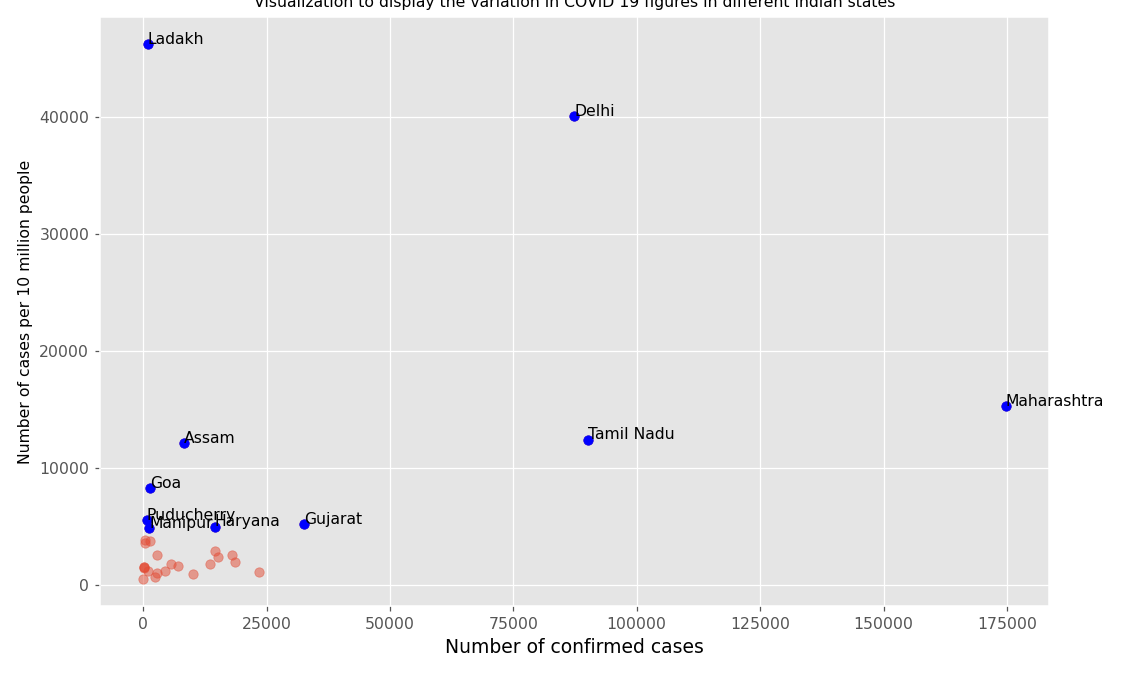

In [31]:
df = covid19_df_latest[(covid19_df_latest['Confirmed']>=30000)| (covid19_df_latest['Cases/10million']>=4000)]
plt.figure(figsize=(10,6),dpi=90)
plt.scatter(covid19_df_latest['Confirmed'],covid19_df_latest['Cases/10million'],alpha=0.5)
plt.xlabel('Number of confirmed cases',size=12)
plt.ylabel('Number of cases per 10 million people',size=10)
plt.scatter(df['Confirmed'],df['Cases/10million'],color='blue')


for i in range(df.shape[0]):
    plt.annotate(df['State/UnionTerritory'].tolist()[i], xy=(df['Confirmed'].tolist()[i],df['Cases/10million'].tolist()[i]),
    xytext = (df['Confirmed'].tolist()[i]+1.0, df['Cases/10million'].tolist()[i]+12.0),size=10)

plt.tight_layout()
plt.title('Visualization to display the variation in COVID 19 figures in different Indian states', size=10)
plt.show()

<IPython.core.display.Javascript object>


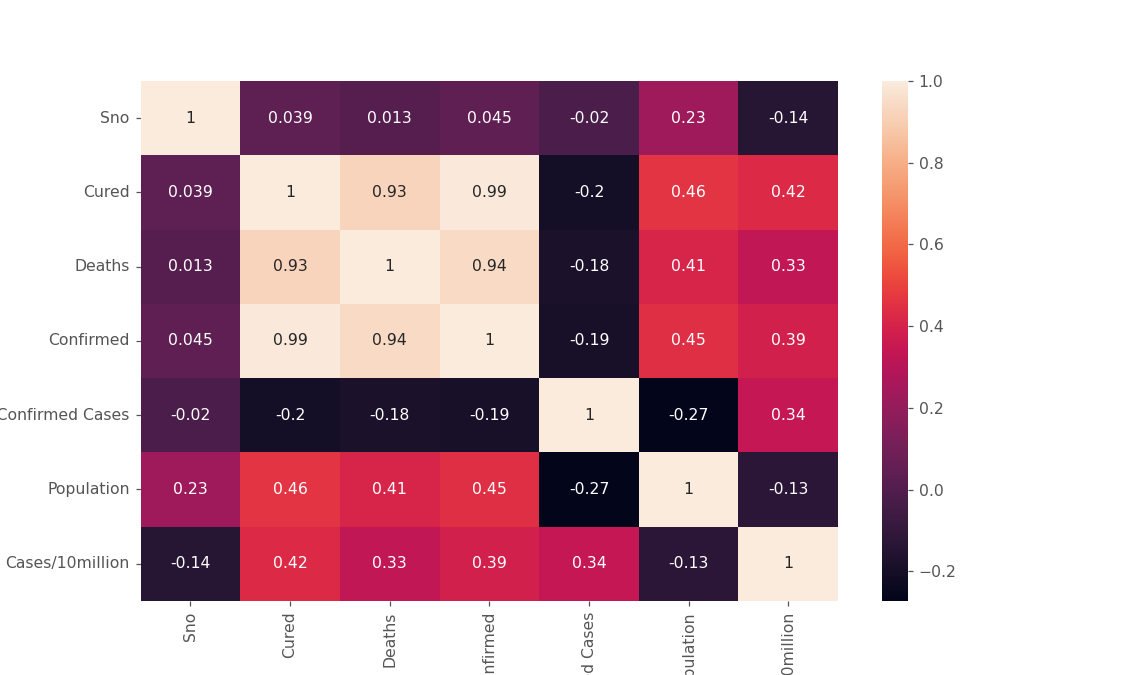

C:\Users\HARSHIT\AppData\Local\Temp\ipykernel_12332\525014400.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(covid19_df_latest.corr(),annot=True)


<Axes: >

In [32]:
plt.figure(figsize=(10,6),dpi=90)
sns.heatmap(covid19_df_latest.corr(),annot=True)

## INDIVIDUAL DATA


In [33]:
individuals_df.iloc[0]

id                                       0
government_id                     KL-TS-P1
diagnosed_date                  30/01/2020
age                                     20
gender                                   F
detected_city                     Thrissur
detected_district                 Thrissur
detected_state                      Kerala
nationality                          India
current_status                   Recovered
status_change_date              14/02/2020
notes                 Travelled from Wuhan
Name: 0, dtype: object

The first case in India due to COVID-19 was noticed on 30th January 2020. It was detected in the city of Thrissur in Kerala. The individual had a travel history in Wuhan.

In [34]:
individuals_grouped_district = individuals_df.groupby('detected_district')
individuals_grouped_district = individuals_grouped_district['id']
individuals_grouped_district.columns=['count']
individuals_grouped_district.count().sort_values(ascending=False).head()

detected_district
Mumbai       3149
Ahmedabad    2181
Indore       1176
Jaipur        808
Pune          706
Name: id, dtype: int64

<IPython.core.display.Javascript object>


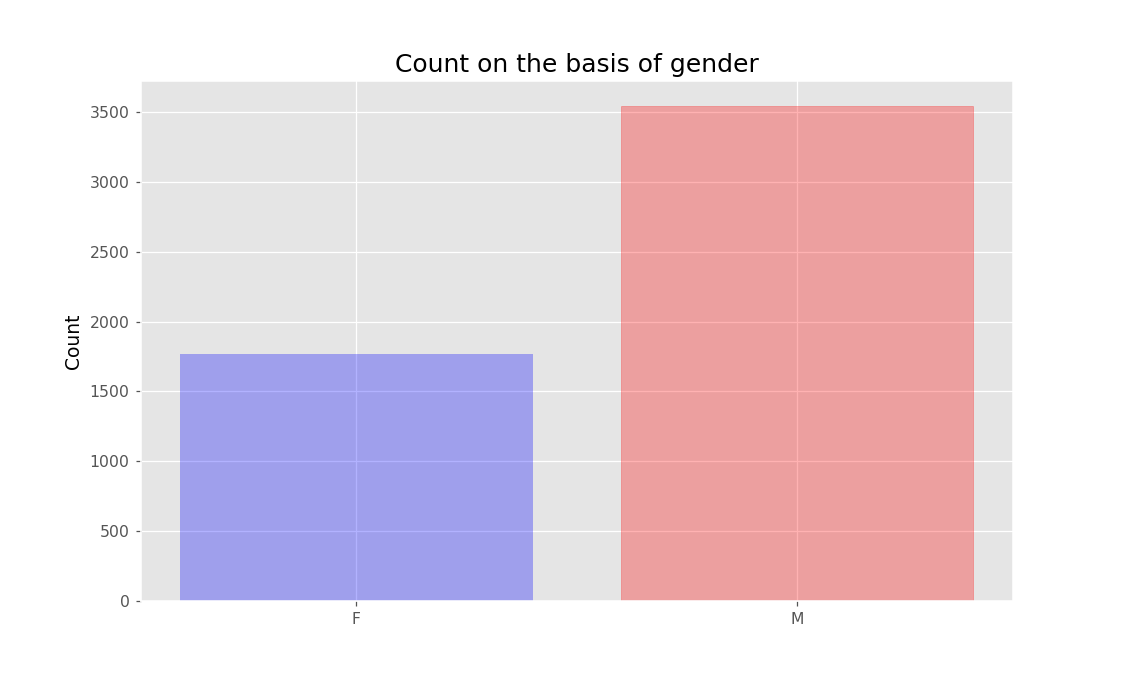

In [44]:
individuals_grouped_gender = individuals_df.groupby('gender')
individuals_grouped_gender = pd.DataFrame(individuals_grouped_gender.size().reset_index(name='count'))
individuals_grouped_gender.head()

plt.figure(figsize=(10,6),dpi=90)
barlist= plt.bar(individuals_grouped_gender['gender'],individuals_grouped_gender['count'],align='center',color='blue',alpha=0.3)
barlist[1].set_color('r')
plt.ylabel('Count',size=12)
plt.title('Count on the basis of gender',size=16)
plt.show()


From the data, it seems that the virus is affecting males more than females in India.

## GRAPH TO SHOW COMPARISON BETWEEN 5 AFFECTED STATES

In [52]:
covid19_maharashtra = covid19_df[covid19_df['State/UnionTerritory']=="Maharashtra"]
covid19_maharashtra.head()
covid19_maharashtra.reset_index(inplace=True)
covid19_maharashtra= covid19_maharashtra.drop(['index', 'Sno', 'Time', 'ConfirmedIndianNational', 'ConfirmedForeignNational','Cured'],  axis = 1)
covid19_maharashtra.reset_index(inplace = True)
covid19_maharashtra.columns = ['Day Count', 'Date', 'State/UnionTerritory', 'Deaths', 'Confirmed']
covid19_maharashtra['Day Count'] = covid19_maharashtra['Day Count'] +8
missing_values = pd.DataFrame({"Day Count":[x for x in range(1,8)],
                              "Date": ["0"+ str(x)+"/06/20" for x in range(2,9)],
                              "State/UnionTerritory": ["Maharashtra"]*7,
                                "Deaths": [0]*7,
                                  "Confirmed": [0]*7})
covid19_maharashtra = covid19_maharashtra.append(missing_values,ignore_index=True)
covid19_maharashtra = covid19_maharashtra.sort_values(by="Day Count", ascending = True)

covid19_maharashtra.reset_index(drop=True, inplace=True)
print(covid19_maharashtra.shape)
covid19_maharashtra.head()

(122, 5)


C:\Users\HARSHIT\AppData\Local\Temp\ipykernel_12332\928352712.py:13: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



,Day Count,Date,State/UnionTerritory,Deaths,Confirmed
0,1,02/06/20,Maharashtra,0,0
1,2,03/06/20,Maharashtra,0,0
2,3,04/06/20,Maharashtra,0,0
3,4,05/06/20,Maharashtra,0,0
4,5,06/06/20,Maharashtra,0,0


In [53]:
covid19_kerala = covid19_df[covid19_df['State/UnionTerritory'] == "Kerala"]
covid19_kerala = covid19_kerala.iloc[32:]
covid19_kerala.reset_index(inplace = True)
covid19_kerala = covid19_kerala.drop(['index','Sno', 'Time', 'ConfirmedIndianNational', 'ConfirmedForeignNational','Cured'], axis = 1)
covid19_kerala.reset_index(inplace = True)
covid19_kerala.columns = ['Day Count', 'Date', 'State/UnionTerritory', 'Deaths', 'Confirmed']
covid19_kerala['Day Count'] = covid19_kerala['Day Count'] + 1
print(covid19_kerala.shape)
covid19_kerala.head()

(122, 5)


,Day Count,Date,State/UnionTerritory,Deaths,Confirmed
0,1,02/03/20,Kerala,0,3
1,2,03/03/20,Kerala,0,3
2,3,04/03/20,Kerala,0,3
3,4,05/03/20,Kerala,0,3
4,5,06/03/20,Kerala,0,3


In [54]:
covid19_delhi = covid19_df[covid19_df['State/UnionTerritory'] == "Delhi"]
covid19_delhi.reset_index(inplace = True)
covid19_delhi = covid19_delhi.drop(['index','Sno', 'Time', 'ConfirmedIndianNational', 'ConfirmedForeignNational','Cured'], axis = 1)
covid19_delhi.reset_index(inplace = True)
covid19_delhi.columns = ['Day Count', 'Date', 'State/UnionTerritory', 'Deaths', 'Confirmed']
covid19_delhi['Day Count'] = covid19_delhi['Day Count'] + 1
print(covid19_delhi.shape)
covid19_delhi.head()

(122, 5)


,Day Count,Date,State/UnionTerritory,Deaths,Confirmed
0,1,02/03/20,Delhi,0,1
1,2,03/03/20,Delhi,0,1
2,3,04/03/20,Delhi,0,1
3,4,05/03/20,Delhi,0,2
4,5,06/03/20,Delhi,0,3


In [55]:
covid19_gujarat = covid19_df[covid19_df['State/UnionTerritory'] == "Gujarat"]
covid19_gujarat.reset_index(inplace = True)
covid19_gujarat = covid19_gujarat.drop(['index','Sno', 'Time', 'ConfirmedIndianNational', 'ConfirmedForeignNational','Cured'], axis = 1)
covid19_gujarat.reset_index(inplace = True)
covid19_gujarat.columns = ['Day Count', 'Date', 'State/UnionTerritory', 'Deaths', 'Confirmed']
covid19_gujarat['Day Count'] = covid19_gujarat['Day Count'] + 19
missing_values = pd.DataFrame({"Day Count": [x for x in range(1,19)],
                           "Date": [("0" + str(x) if x < 10 else str(x))+"/03/20" for x in range(2,20)],
                           "State/UnionTerritory": ["Gujarat"]*18,
                           "Deaths": [0]*18,
                           "Confirmed": [0]*18})
covid19_gujarat = covid19_gujarat.append(missing_values, ignore_index = True)
covid19_gujarat = covid19_gujarat.sort_values(by="Day Count", ascending = True)
covid19_gujarat.reset_index(drop=True, inplace=True)
print(covid19_gujarat.shape)
covid19_gujarat.head()

(122, 5)


C:\Users\HARSHIT\AppData\Local\Temp\ipykernel_12332\3533786358.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



,Day Count,Date,State/UnionTerritory,Deaths,Confirmed
0,1,02/03/20,Gujarat,0,0
1,2,03/03/20,Gujarat,0,0
2,3,04/03/20,Gujarat,0,0
3,4,05/03/20,Gujarat,0,0
4,5,06/03/20,Gujarat,0,0


In [56]:
covid19_tamilnadu = covid19_df[covid19_df['State/UnionTerritory'] == "Tamil Nadu"]
covid19_tamilnadu.reset_index(inplace = True)
covid19_tamilnadu = covid19_tamilnadu.drop(['index','Sno', 'Time', 'ConfirmedIndianNational', 'ConfirmedForeignNational','Cured'], axis = 1)
covid19_tamilnadu.reset_index(inplace = True)
covid19_tamilnadu.columns = ['Day Count', 'Date', 'State/UnionTerritory', 'Deaths', 'Confirmed']
covid19_tamilnadu['Day Count'] = covid19_delhi['Day Count'] + 1
print(covid19_tamilnadu.shape)
covid19_tamilnadu.head()

(117, 5)


,Day Count,Date,State/UnionTerritory,Deaths,Confirmed
0,2,07/03/20,Tamil Nadu,0,1
1,3,08/03/20,Tamil Nadu,0,1
2,4,09/03/20,Tamil Nadu,0,1
3,5,10/03/20,Tamil Nadu,0,1
4,6,11/03/20,Tamil Nadu,0,1


<IPython.core.display.Javascript object>


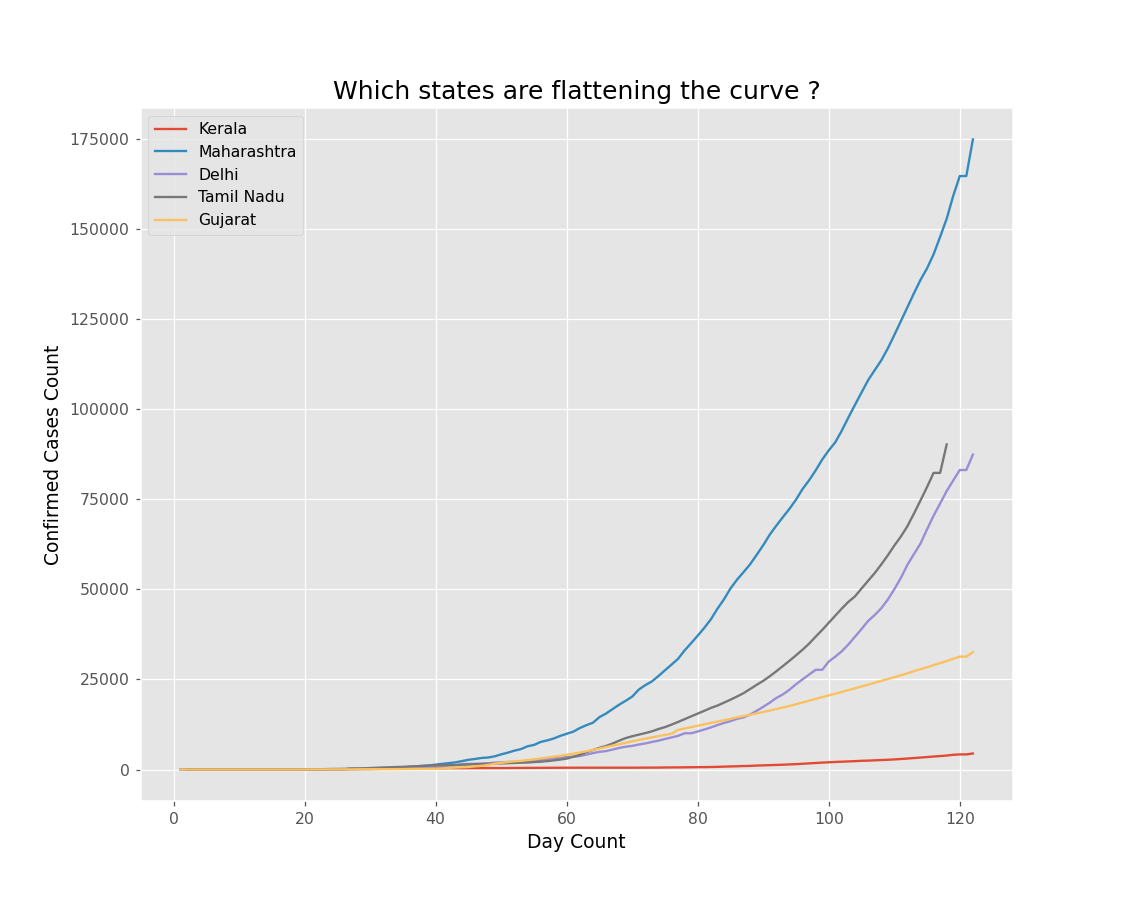

In [58]:
plt.figure(figsize=(10,8), dpi=90)
plt.plot(covid19_kerala['Day Count'], covid19_kerala['Confirmed'])
plt.plot(covid19_maharashtra['Day Count'], covid19_maharashtra['Confirmed'])
plt.plot(covid19_delhi['Day Count'], covid19_delhi['Confirmed'])
plt.plot(covid19_tamilnadu['Day Count'], covid19_tamilnadu['Confirmed'])
plt.plot(covid19_gujarat['Day Count'], covid19_gujarat['Confirmed'])
plt.legend(['Kerala', 'Maharashtra', 'Delhi', 'Tamil Nadu', 'Gujarat'], loc='upper left')
plt.xlabel('Day Count', size=12)
plt.ylabel('Confirmed Cases Count', size=12)
plt.title('Which states are flattening the curve ?', size = 16)
plt.show()

We see almost all the curves follow the curve which is displayed by the nation as a whole. The only anomaly is that of Kerala. Kerala's curve saw the gradual incline in the period between 20-30 days as seen in other curves. But what Kerala managed to do was it did not let the curve incline further and manage to flatten the curve. As a result, the state has been able to contain the situation.

The situation in Maharashtra looks very grave indeed. The curve has had an immense steep incline and shows no signs of slowing down. Gujarat's curve steeped at a later time interval compared to the rest.

## Growth of Virus in India

<IPython.core.display.Javascript object>


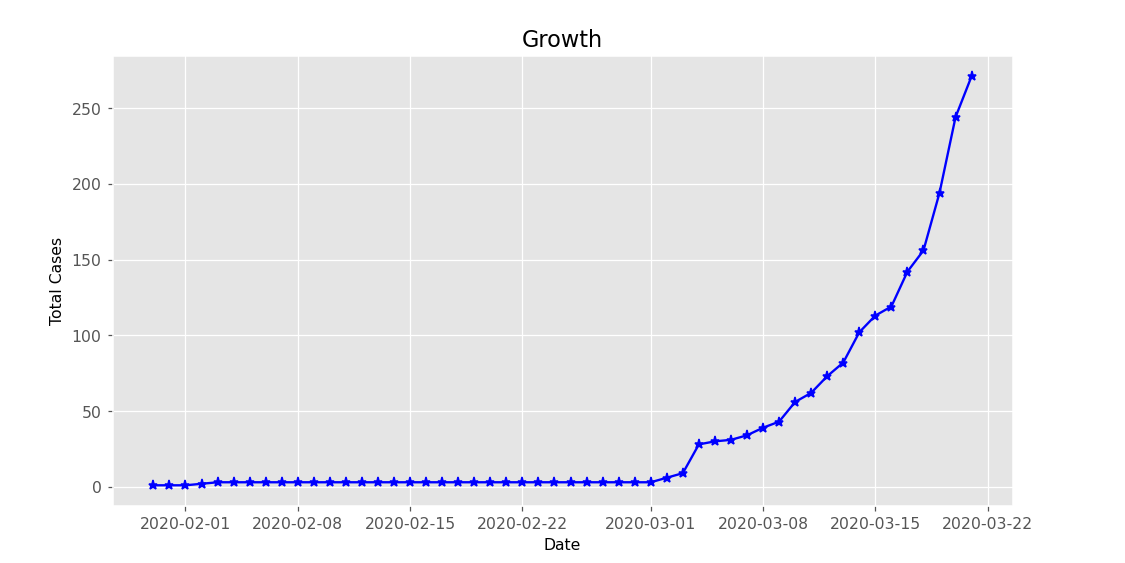

In [61]:
fig=plt.figure(figsize=(10,5),dpi=90)
axes=fig.add_axes([0.1,0.1,0.8,0.8])
axes.plot(dbd_India["Date"],dbd_India["Total Cases"],color='blue',marker='*')
axes.set_xlabel("Date")
axes.set_ylabel("Total Cases")
axes.set_title("Growth")
plt.show()


## VACCINATION

In [20]:
vaccine_df.head()

,Updated On,State,Total Doses Administered,Sessions,Sites,First Dose Administered,Second Dose Administered,Male (Doses Administered),Female (Doses Administered),Transgender (Doses Administered),...,18-44 Years (Doses Administered),45-60 Years (Doses Administered),60+ Years (Doses Administered),18-44 Years(Individuals Vaccinated),45-60 Years(Individuals Vaccinated),60+ Years(Individuals Vaccinated),Male(Individuals Vaccinated),Female(Individuals Vaccinated),Transgender(Individuals Vaccinated),Total Individuals Vaccinated
0,16/01/2021,India,48276.0,3455.0,2957.0,48276.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,23757.0,24517.0,2.0,48276.0
1,17/01/2021,India,58604.0,8532.0,4954.0,58604.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,27348.0,31252.0,4.0,58604.0
2,18/01/2021,India,99449.0,13611.0,6583.0,99449.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,41361.0,58083.0,5.0,99449.0
3,19/01/2021,India,195525.0,17855.0,7951.0,195525.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,81901.0,113613.0,11.0,195525.0
4,20/01/2021,India,251280.0,25472.0,10504.0,251280.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,98111.0,153145.0,24.0,251280.0


In [21]:
vaccine_df.rename(columns = {'Updated On' : 'Vaccine_Date'}, inplace = True)

In [22]:
vaccine_df.head(10)

,Vaccine_Date,State,Total Doses Administered,Sessions,Sites,First Dose Administered,Second Dose Administered,Male (Doses Administered),Female (Doses Administered),Transgender (Doses Administered),...,18-44 Years (Doses Administered),45-60 Years (Doses Administered),60+ Years (Doses Administered),18-44 Years(Individuals Vaccinated),45-60 Years(Individuals Vaccinated),60+ Years(Individuals Vaccinated),Male(Individuals Vaccinated),Female(Individuals Vaccinated),Transgender(Individuals Vaccinated),Total Individuals Vaccinated
0,16/01/2021,India,48276.0,3455.0,2957.0,48276.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,23757.0,24517.0,2.0,48276.0
1,17/01/2021,India,58604.0,8532.0,4954.0,58604.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,27348.0,31252.0,4.0,58604.0
2,18/01/2021,India,99449.0,13611.0,6583.0,99449.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,41361.0,58083.0,5.0,99449.0
3,19/01/2021,India,195525.0,17855.0,7951.0,195525.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,81901.0,113613.0,11.0,195525.0
4,20/01/2021,India,251280.0,25472.0,10504.0,251280.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,98111.0,153145.0,24.0,251280.0
5,21/01/2021,India,365965.0,32226.0,12600.0,365965.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,132784.0,233143.0,38.0,365965.0
6,22/01/2021,India,549381.0,36988.0,14115.0,549381.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,193899.0,355402.0,80.0,549381.0
7,23/01/2021,India,759008.0,43076.0,15605.0,759008.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,267856.0,491049.0,103.0,759008.0
8,24/01/2021,India,835058.0,49851.0,18111.0,835058.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,296283.0,538647.0,128.0,835058.0
9,25/01/2021,India,1277104.0,55151.0,19682.0,1277104.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,444137.0,832766.0,201.0,1277104.0


In [23]:
vaccine_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7845 entries, 0 to 7844
Data columns (total 24 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Vaccine_Date                         7845 non-null   object 
 1   State                                7845 non-null   object 
 2   Total Doses Administered             7621 non-null   float64
 3   Sessions                             7621 non-null   float64
 4    Sites                               7621 non-null   float64
 5   First Dose Administered              7621 non-null   float64
 6   Second Dose Administered             7621 non-null   float64
 7   Male (Doses Administered)            7461 non-null   float64
 8   Female (Doses Administered)          7461 non-null   float64
 9   Transgender (Doses Administered)     7461 non-null   float64
 10   Covaxin (Doses Administered)        7621 non-null   float64
 11  CoviShield (Doses Administered

In [24]:
vaccine_df.isnull().sum()

Vaccine_Date                              0
State                                     0
Total Doses Administered                224
Sessions                                224
 Sites                                  224
First Dose Administered                 224
Second Dose Administered                224
Male (Doses Administered)               384
Female (Doses Administered)             384
Transgender (Doses Administered)        384
 Covaxin (Doses Administered)           224
CoviShield (Doses Administered)         224
Sputnik V (Doses Administered)         4850
AEFI                                   2407
18-44 Years (Doses Administered)       6143
45-60 Years (Doses Administered)       6143
60+ Years (Doses Administered)         6143
18-44 Years(Individuals Vaccinated)    4112
45-60 Years(Individuals Vaccinated)    4111
60+ Years(Individuals Vaccinated)      4111
Male(Individuals Vaccinated)           7685
Female(Individuals Vaccinated)         7685
Transgender(Individuals Vaccinat

In [25]:
vaccination = vaccine_df.drop(columns = ['Sputnik V (Doses Administered)', 'AEFI', '18-44 Years (Doses Administered)' , '45-60 Years (Doses Administered)', '60+ Years (Doses Administered)'], axis = 1)

In [26]:
vaccination.head()

,Vaccine_Date,State,Total Doses Administered,Sessions,Sites,First Dose Administered,Second Dose Administered,Male (Doses Administered),Female (Doses Administered),Transgender (Doses Administered),Covaxin (Doses Administered),CoviShield (Doses Administered),18-44 Years(Individuals Vaccinated),45-60 Years(Individuals Vaccinated),60+ Years(Individuals Vaccinated),Male(Individuals Vaccinated),Female(Individuals Vaccinated),Transgender(Individuals Vaccinated),Total Individuals Vaccinated
0,16/01/2021,India,48276.0,3455.0,2957.0,48276.0,0.0,NaN,NaN,NaN,579.0,47697.0,NaN,NaN,NaN,23757.0,24517.0,2.0,48276.0
1,17/01/2021,India,58604.0,8532.0,4954.0,58604.0,0.0,NaN,NaN,NaN,635.0,57969.0,NaN,NaN,NaN,27348.0,31252.0,4.0,58604.0
2,18/01/2021,India,99449.0,13611.0,6583.0,99449.0,0.0,NaN,NaN,NaN,1299.0,98150.0,NaN,NaN,NaN,41361.0,58083.0,5.0,99449.0
3,19/01/2021,India,195525.0,17855.0,7951.0,195525.0,0.0,NaN,NaN,NaN,3017.0,192508.0,NaN,NaN,NaN,81901.0,113613.0,11.0,195525.0
4,20/01/2021,India,251280.0,25472.0,10504.0,251280.0,0.0,NaN,NaN,NaN,3946.0,247334.0,NaN,NaN,NaN,98111.0,153145.0,24.0,251280.0


In [27]:
# Remove rows where state = India

vaccine = vaccine_df[vaccine_df.State!='India']
vaccine

,Vaccine_Date,State,Total Doses Administered,Sessions,Sites,First Dose Administered,Second Dose Administered,Male (Doses Administered),Female (Doses Administered),Transgender (Doses Administered),...,18-44 Years (Doses Administered),45-60 Years (Doses Administered),60+ Years (Doses Administered),18-44 Years(Individuals Vaccinated),45-60 Years(Individuals Vaccinated),60+ Years(Individuals Vaccinated),Male(Individuals Vaccinated),Female(Individuals Vaccinated),Transgender(Individuals Vaccinated),Total Individuals Vaccinated
212,16/01/2021,Andaman and Nicobar Islands,23.0,2.0,2.0,23.0,0.0,12.0,11.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23.0
213,17/01/2021,Andaman and Nicobar Islands,23.0,2.0,2.0,23.0,0.0,12.0,11.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23.0
214,18/01/2021,Andaman and Nicobar Islands,42.0,9.0,2.0,42.0,0.0,29.0,13.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,42.0
215,19/01/2021,Andaman and Nicobar Islands,89.0,12.0,2.0,89.0,0.0,53.0,36.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,89.0
216,20/01/2021,Andaman and Nicobar Islands,124.0,16.0,3.0,124.0,0.0,67.0,57.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,124.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7840,11/08/2021,West Bengal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7841,12/08/2021,West Bengal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7842,13/08/2021,West Bengal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7843,14/08/2021,West Bengal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [28]:
vaccine.rename(columns = {"Total Individuals Vaccinated": "Total"}, inplace= True)
vaccine.head()

C:\Users\HARSHIT\AppData\Local\Temp\ipykernel_1816\560008889.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vaccine.rename(columns = {"Total Individuals Vaccinated": "Total"}, inplace= True)


,Vaccine_Date,State,Total Doses Administered,Sessions,Sites,First Dose Administered,Second Dose Administered,Male (Doses Administered),Female (Doses Administered),Transgender (Doses Administered),...,18-44 Years (Doses Administered),45-60 Years (Doses Administered),60+ Years (Doses Administered),18-44 Years(Individuals Vaccinated),45-60 Years(Individuals Vaccinated),60+ Years(Individuals Vaccinated),Male(Individuals Vaccinated),Female(Individuals Vaccinated),Transgender(Individuals Vaccinated),Total
212,16/01/2021,Andaman and Nicobar Islands,23.0,2.0,2.0,23.0,0.0,12.0,11.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23.0
213,17/01/2021,Andaman and Nicobar Islands,23.0,2.0,2.0,23.0,0.0,12.0,11.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23.0
214,18/01/2021,Andaman and Nicobar Islands,42.0,9.0,2.0,42.0,0.0,29.0,13.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,42.0
215,19/01/2021,Andaman and Nicobar Islands,89.0,12.0,2.0,89.0,0.0,53.0,36.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,89.0
216,20/01/2021,Andaman and Nicobar Islands,124.0,16.0,3.0,124.0,0.0,67.0,57.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,124.0


In [29]:
# Most vaccinated State

max_vac = vaccine.groupby('State')['Total'].sum().to_frame('Total')
max_vac = max_vac.sort_values('Total', ascending = False)[:5]
max_vac

,Total
State,
Maharashtra,1.403075e+09
Uttar Pradesh,1.200575e+09
Rajasthan,1.141163e+09
Gujarat,1.078261e+09
West Bengal,9.250227e+08


<IPython.core.display.Javascript object>


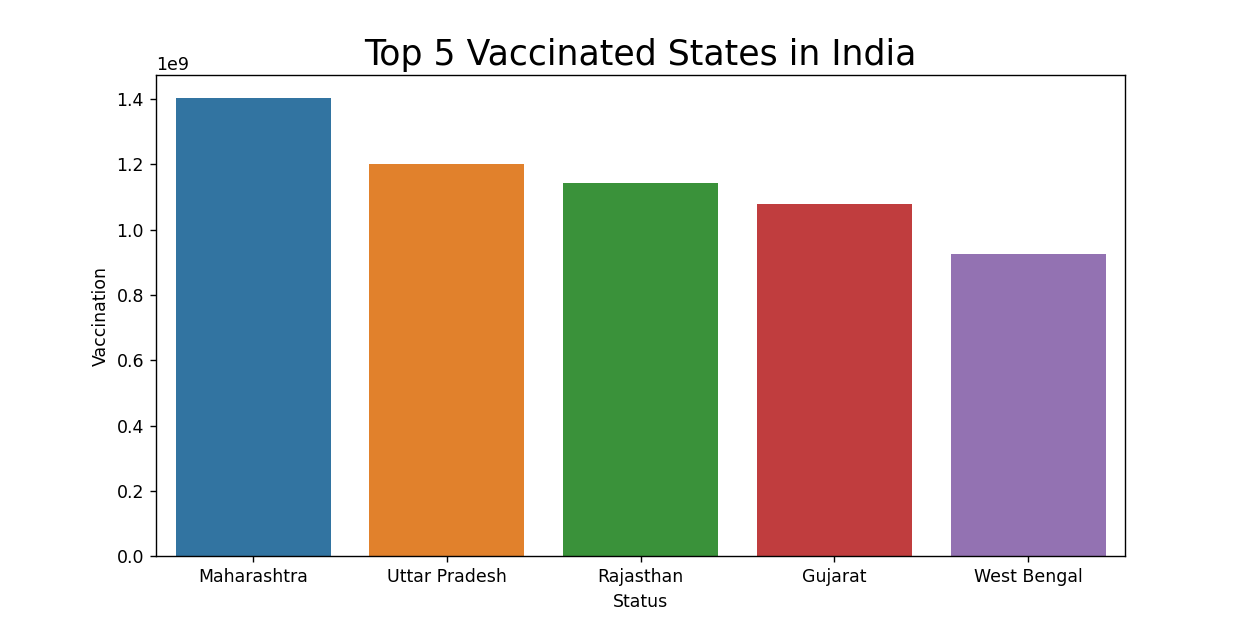

In [30]:
fig = plt.figure(figsize = (10,5))
plt.title("Top 5 Vaccinated States in India", size=20)
x = sns.barplot(data = max_vac.iloc[:10], y= max_vac.Total, x = max_vac.index, linewidth=2)
plt.xlabel("Status")
plt.ylabel("Vaccination")
plt.show()

## THANK YOU !!!